# giriş - müşteri analitiği çalışmaları

* müşteri verileri anahtar perfomans göstergeleri:
  * müşteri yaşaboyu değeri
  * aylık ciro
  * müşteri aktifliği
  * elde tutma oranı
* müşteri segmentasyon
* müşteri kaybı tahmini
* sepet analizi
* ürün öneri sistemleri
* a/b testleri
* kampanya optimizasyonu
* ciro tahmini
* bir sonraki alışveriş zamanı tahmini
* uplift modelleme

# gerekli kütüphaneler

In [1]:
# uyarı ayarı
import warnings
warnings.filterwarnings("ignore")

# veri işleme
import pandas as pd
import numpy as np

# istatistik
import scipy as sc
import hypothetical
import pingouin
import statsmodels as sm

# veri görselleştirme
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import HTML, display

# kütüphane ayarları
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

# verinin çalışma ortamına alınması

2009-2011 dönemi verileri **veri** isimli değişken olarak çalışma ortamına alınır:

In [2]:
veri = pd.read_csv("dataset/online_retail_2.csv")

# veri seti hakkında ön bilgi

[Çevrimiçi Perakende (Online Retail) 2](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) veri seti, Birleşik Krallık merkezli ve tescilli, mağaza dışı bir çevrimiçi perakende için 01/12/2009 ve 09/12/2011 tarihleri arasında gerçekleşen tüm işlemleri içerir. Şirket esas olarak her durumda benzersiz hediyelik eşya satmaktadır. Firmanın birçok müşterisi toptancıdır.

veri alanları:

* InvoiceNo: Fatura numarası. Nominal. Her işleme benzersiz şekilde atanan 6 basamaklı bir sayı. Bu kod 'c' harfiyle başlıyorsa, bir iptal olduğunu gösterir.
* StockCode: Ürün (öğe) kodu. Nominal. Her farklı ürüne benzersiz şekilde atanmış 5 basamaklı bir sayı.
* Description: Ürün (öğe) adı. Nominal.
* Quantity: İşlem başına her bir ürünün (öğenin) miktarı. Sayısal.
* InvoiceDate: Fatura tarihi ve saati. Sayısal. Bir işlemin oluşturulduğu gün ve saat.
* UnitPrice: Birim fiyat. Sayısal. Birim başına ürün fiyatı (£).
* CustomerID: Müşteri numarası. Nominal. Her müşteriye benzersiz şekilde atanmış 5 basamaklı bir integral numarası.
* Country: Ülke adı. Nominal. Müşterinin ikamet ettiği ülkenin adı.

veri seti üzerinde çalışmalar:

* Chen, D. Sain, S.L., and Guo, K. (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208. doi: [Web Link].
* Chen, D., Guo, K. and Ubakanma, G. (2015), Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, Vol. 2, No. 1, pp.1-18. doi: [Web Link].
* Chen, D., Guo, K., and Li, Bo (2019), Predicting Customer Profitability Dynamically over Time: An Experimental Comparative Study, 24th Iberoamerican Congress on Pattern Recognition (CIARP 2019), Havana, Cuba, 28-31 Oct, 2019.
* Laha Ale, Ning Zhang, Huici Wu, Dajiang Chen, and Tao Han, Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE Internet of Things Journal, Vol. 6, Issue 3, pp. 5520-5530, 2019.
* Rina Singh, Jeffrey A. Graves, Douglas A. Talbert, William Eberle, Prefix and Suffix Sequential Pattern Mining, Industrial Conference on Data Mining 2018: Advances in Data Mining. Applications and Theoretical Aspects, pp. 309-324. 2018.

# verinin incelenmesi

verinin boyutu:

In [3]:
print(f"veri seti {veri.shape[0]} satır, {veri.shape[1]} sütun veriden oluşuyor.")

veri seti 1067371 satır, 8 sütun veriden oluşuyor.


verideki ilk 5 gözlem:

In [4]:
veri.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


verideki son 5 gözlem:

In [5]:
veri.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


veri setindeki değişken türleri ve doluluk hakkında bir bilgi:

In [6]:
veri.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


veride boş değerler var mı?

In [7]:
print(veri.isnull().sum().sort_values(ascending=False))

Customer ID    243007
Description      4382
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64


tekil müşteri sayısı:

In [8]:
print('tekil müşteri sayısı: ', veri['Customer ID'].nunique())

tekil müşteri sayısı:  5942


tekil işlem sayısı:

In [9]:
print('tekil işlem sayısı: ', veri['Invoice'].nunique())

tekil işlem sayısı:  53628


müşteri başına işlem sayısı:

In [10]:
print('tekil işlem sayısı: ', round(veri['Invoice'].nunique() / veri['Customer ID'].nunique(), 2))

tekil işlem sayısı:  9.03


işlemler için toplam fiyat:

In [11]:
veri["TotalPrice"] = veri["Quantity"]*veri["Price"]

özet istatistikler:

In [12]:
veri[['Price', 'Quantity', 'TotalPrice']].describe()

,Price,Quantity,TotalPrice
count,1.067371e+06,1.067371e+06,1.067371e+06
mean,4.649388e+00,9.938898e+00,1.806987e+01
std,1.235531e+02,1.727058e+02,2.924202e+02
min,-5.359436e+04,-8.099500e+04,-1.684696e+05
25%,1.250000e+00,1.000000e+00,3.750000e+00
50%,2.100000e+00,3.000000e+00,9.900000e+00
75%,4.150000e+00,1.000000e+01,1.770000e+01
max,3.897000e+04,8.099500e+04,1.684696e+05


* ürün başına ortalama ~ 10 birim adet satılmış.
* müşterilerin % 25'i, fiyatı 3,75 £ olan yalnızca bir birim satın almış.
* müşterilerin % 50'si, fiyatı ortalama 2,10 £ olan 3 birimden daha azını satın almış.
* müşterilerin % 75'i, fiyatı 4,15 sterlin olan 10 birimden daha azını satın almış.

fiyat ve miktar arasındaki korelasyon (?):

In [13]:
veri[['Price', 'Quantity', 'TotalPrice']].corr()

,Price,Quantity,TotalPrice
Price,1.000000,-0.001319,0.061029
Quantity,-0.001319,1.000000,0.762623
TotalPrice,0.061029,0.762623,1.000000


Shapiro-Wilk normallik testi:

$$W = \frac{(\sum_{i=1}^n a_i x_{i})^2}
{\sum_{i=1}^n (x_i - \overline{x})^2}$$

$$(a_1, ..., a_n) = \frac{m^TV^{-1}}{(m^TV^{-1}V^{-1}m)^{1/2}}$$

In [14]:
pingouin.normality(veri['TotalPrice'], method='normaltest')

,W,pval,normal
TotalPrice,2.071447e+06,0.0,False


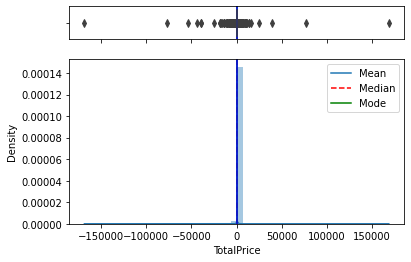

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean = veri['TotalPrice'].mean()
median = veri['TotalPrice'].median()
mode = veri['TotalPrice'].mode()[0]

sns.boxplot(veri['TotalPrice'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(veri['TotalPrice'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

tekil ürünler:

In [16]:
print('tekil ürünler: ', veri['Description'].nunique())
print( '\n', veri['Description'].unique())

tekil ürünler:  5698

 ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


müşteriler en çok hangi ürünleri tercih etmişler?

In [17]:
en_çok_alınan = veri['Description'].value_counts().head(15)

print('en çok alınan ürünler: \n')
print(en_çok_alınan)

en çok alınan ürünler: 

WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
STRAWBERRY CERAMIC TRINKET BOX        2613
LUNCH BAG  BLACK SKULL.               2529
JUMBO STORAGE BAG SUKI                2434
HEART OF WICKER SMALL                 2319
JUMBO SHOPPER VINTAGE RED PAISLEY     2297
60 TEATIME FAIRY CAKE CASES           2271
PAPER CHAIN KIT 50'S CHRISTMAS        2215
LUNCH BAG SPACEBOY DESIGN             2206
REX CASH+CARRY JUMBO SHOPPER          2199
HOME BUILDING BLOCK WORD              2192
Name: Description, dtype: int64


Text(0.5, 1.0, 'en çok satılan ürünler')

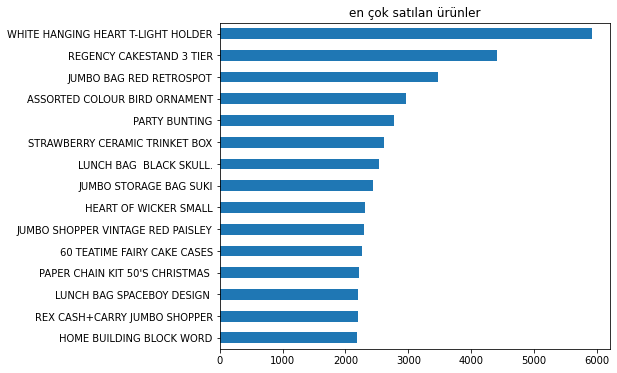

In [18]:
plt.figure(figsize=(7,6))
en_çok_alınan.plot(kind='barh').invert_yaxis()
plt.title('en çok satılan ürünler')

In [19]:
display(HTML("<table><tr><td><img src='img/white_hanging_heart.jpg'></td><td><img src='img/regency cakestand.jpg'></td></tr></table>"))

,


ürünlerin satıldığı farklı ülkeler:

In [20]:
veri['Country'].value_counts() 

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
USA                        535
Poland                     535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

ülke grupları:

In [21]:
# ülke grupları
avrupa_ülkeleri = ['Austria', 'Belgium', 'Cyprus', 'Czech Republic', 'Denmark',
                   'EIRE', 'European Community', 'Finland', 'France', 'Germany',
                   'Greece', 'Iceland','Italy', 'Lithuania', 'Malta', 'Netherlands',
                   'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland',
                   'United Kingdom', 'Channel Islands']

amerika_ülkeleri = ['Canada', 'USA', 'Brazil', 'Bermuda']

asya_ülkeleri = ['Bahrain','Hong Kong', 'Japan', 'Saudi Arabia', 'Singapore', 'Thailand', 'United Arab Emirates']

# ülke grupları fonksiyon
def ülke_grubu(row):
    global avrupa_ülkeleri
    global amerika_ülkeleri
    global asya_ülkeleri
    
    if row['Country'] in avrupa_ülkeleri:
        return "Europe"
    elif row['Country'] in amerika_ülkeleri:
        return "America"
    elif row['Country'] in asya_ülkeleri:
        return "Asia"
    else:
        return "Other"

In [22]:
veri = veri.assign(CountryGroup=veri.apply(ülke_grubu, axis=1))

In [23]:
veri['CountryGroup'].unique()

array(['Europe', 'America', 'Other', 'Asia'], dtype=object)

soru: acaba ülke grupları arasında, TotalPrice değişkeni için bir farklılık var mı?

* eşit varyans testi:

In [24]:
pingouin.homoscedasticity(veri, dv='TotalPrice', group='CountryGroup', method='levene')

,W,pval,equal_var
levene,29.033413,9.205135e-19,False


* eşit varyans yok, bu durumda, kruskal-wallis:

In [25]:
pingouin.kruskal(veri, dv='TotalPrice', between='CountryGroup')

,Source,ddof1,H,p-unc
Kruskal,CountryGroup,3,2690.246166,0.0
